In [50]:
from market_data import load_yfinance

In [73]:
df = load_yfinance("AAPL", start="2020-01-01", end="2025-01-01")

Loading from cache


In [74]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620842,72.681289,71.373218,71.627092,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307518,73.609752,71.849540,71.849540,132079200


In [ ]:
import numpy as np

In [76]:
log_returns = np.log(df["Close"] / df["Close"].shift(1))

In [77]:
log_returns.dropna(inplace=True)

In [78]:
log_returns.dropna(inplace=True)
log_returns

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004714
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2024-12-24    0.011413
2024-12-26    0.003171
2024-12-27   -0.013331
2024-12-30   -0.013352
2024-12-31   -0.007083
Name: Close, Length: 1257, dtype: float64

In [79]:
cum_returns = log_returns.cumsum()
rolling_max = np.maximum.accumulate(cum_returns)
drawdown = cum_returns - rolling_max
drawdown_pct = 1 - np.exp(drawdown)
drawdown_pct.head()

Date
2020-01-03    0.000000
2020-01-06    0.000000
2020-01-07    0.004703
2020-01-08    0.000000
2020-01-09    0.000000
Name: Close, dtype: float64

In [80]:
import matplotlib.pyplot as plt

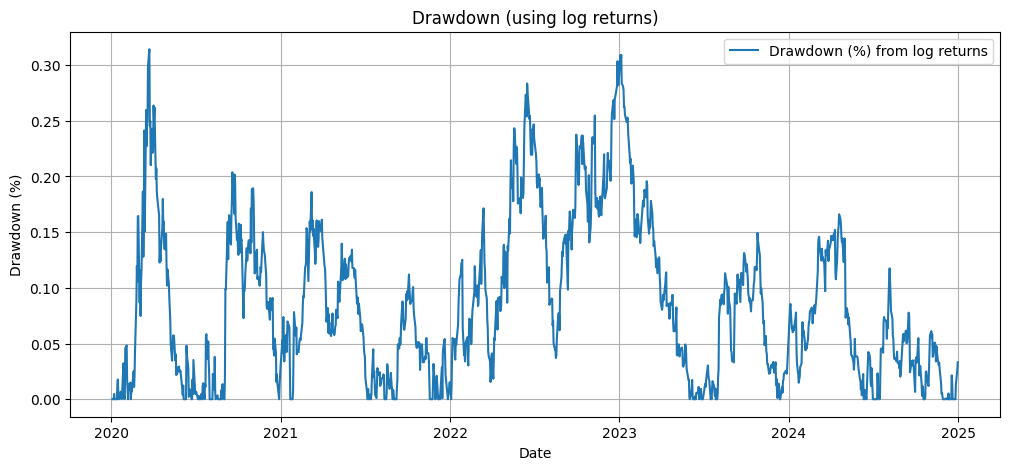

In [81]:
plt.figure(figsize=(12, 5))
plt.plot(drawdown_pct, label="Drawdown (%) from log returns")
plt.title("Drawdown (using log returns)")
plt.ylabel("Drawdown (%)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

In [82]:
# calculate monthly returns
monthly_log_returns = log_returns.resample("ME").sum()
monthly_log_returns

Date
2020-01-31    0.030042
2020-02-29   -0.121831
2020-03-31   -0.072314
2020-04-30    0.144424
2020-05-31    0.081667
2020-06-30    0.137487
2020-07-31    0.152834
2020-08-31    0.196035
2020-09-30   -0.108171
2020-10-31   -0.061888
2020-11-30    0.091204
2020-12-31    0.108472
2021-01-31   -0.005517
2021-02-28   -0.083069
2021-03-31    0.007313
2021-04-30    0.073452
2021-05-31   -0.051816
2021-06-30    0.094500
2021-07-31    0.062958
2021-08-31    0.041612
2021-09-30   -0.070462
2021-10-31    0.057001
2021-11-30    0.099919
2021-12-31    0.071603
2022-01-31   -0.015837
2022-02-28   -0.055582
2022-03-31    0.055882
2022-04-30   -0.102178
2022-05-31   -0.056037
2022-06-30   -0.084937
2022-07-31    0.172804
2022-08-31   -0.031705
2022-09-30   -0.128944
2022-10-31    0.103956
2022-11-30   -0.033585
2022-12-31   -0.130419
2023-01-31    0.104829
2023-02-28    0.022919
2023-03-31    0.112121
2023-04-30    0.028575
2023-05-31    0.045029
2023-06-30    0.090142
2023-07-31    0.012704
2023-0

(<Figure size 1600x600 with 6 Axes>,
 array([<Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>,
        <Axes: ylabel='2024'>], dtype=object))

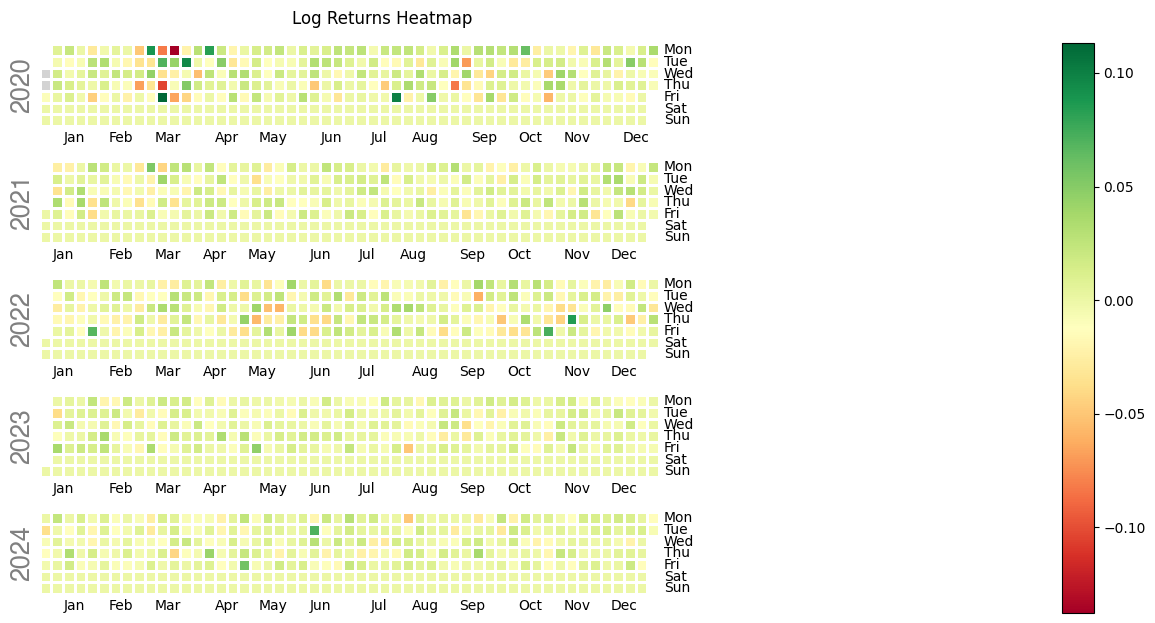

In [83]:
import calplot
import matplotlib.pyplot as plt

calplot.calplot(
    log_returns,
    cmap="RdYlGn",  # Green = positive return, Red = loss
    fillcolor="lightgray",  # For missing months
    linewidth=1,
    edgecolor="white",
    colorbar=True,
    suptitle="Log Returns Heatmap",
    figsize=(16, 6),
    yearlabel_kws={"fontsize": 18},
    daylabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    dayticks=list(range(7)),
)

In [87]:
import pandas as pd


def compute_rolling_volatility(log_returns: pd.Series, N: int) -> pd.Series:
    rolling_volatility = log_returns.rolling(window=N).std()
    return rolling_volatility

In [97]:
rolling_volatility_21 = compute_rolling_volatility(log_returns=log_returns, N=21)
rolling_volatility_21.dropna(inplace=True)
rolling_volatility_21 = rolling_volatility_21 * np.sqrt(252)

In [98]:
rolling_volatility_21

Date
2020-02-03    0.275597
2020-02-04    0.292556
2020-02-05    0.292594
2020-02-06    0.292416
2020-02-07    0.295285
                ...   
2024-12-24    0.139259
2024-12-26    0.136784
2024-12-27    0.149779
2024-12-30    0.160823
2024-12-31    0.162740
Name: Close, Length: 1237, dtype: float64

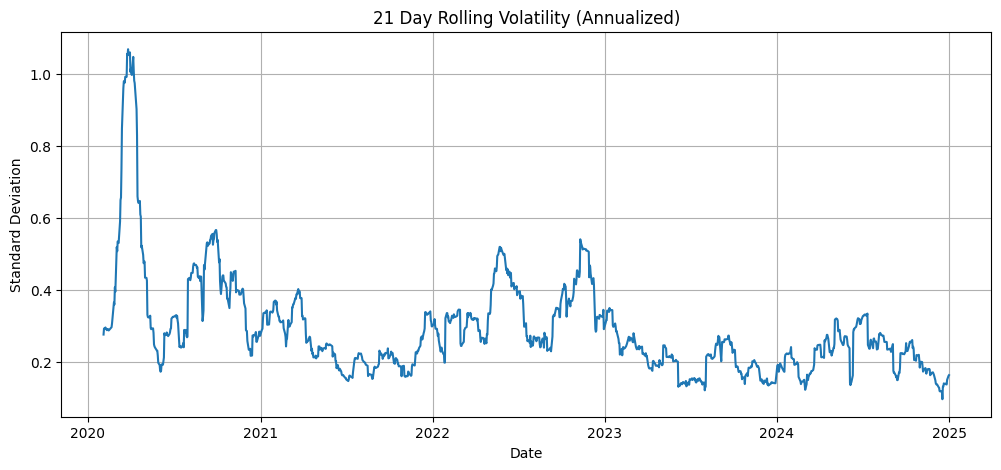

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(rolling_volatility_21)
plt.title("21 Day Rolling Volatility (Annualized)")
plt.ylabel("Standard Deviation")
plt.xlabel("Date")
plt.grid(True)
plt.show()